<h1>Predicción con modelo Logistic Regresion</h1>

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [4]:
dataframe = pd.read_csv("../data/dataset_terror_clean_features.csv")
dataframe.head()

,Unnamed: 0,id,title,quantile,vote_average,duration,popularity,revenues,val_count,is_terror_comedia,Crimen,Animación,Fantasía
0,0,1011679,Shark Side of the Moon,0,5.3,88,456.059,0,3,1,0,0,0
1,1,884184,Consecration,1,6.6,90,451.660,0,1068,1,0,0,0
2,2,988165,HP La casa de la bruja de Lovecraft,3,5.8,82,406.610,0,2571,0,0,0,0
3,3,829410,Sick,1,6.3,83,358.328,0,1068,1,0,0,0
4,4,676547,Reza por el diablo,1,7.1,93,357.880,37655699,1068,1,0,0,0


In [5]:
dataframe.set_index("id")
dataframe = dataframe.iloc[:,1:]

In [6]:
dataframe.columns

Index(['id', 'title', 'quantile', 'vote_average', 'duration', 'popularity',
       'revenues', 'val_count', 'is_terror_comedia', 'Crimen', 'Animación',
       'Fantasía'],
      dtype='object')

In [7]:
X = dataframe[[ 'vote_average', 'duration', 'revenues', "popularity", "val_count", "quantile"]]
y = dataframe['is_terror_comedia']
X.shape

(6513, 6)

In [8]:
validation_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state = seed)

Escalamos las columnas numéricas. 


In [9]:

cols = X_train.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()


,vote_average,duration,revenues,popularity,val_count,quantile
count,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000
mean,0.463432,0.136945,0.008376,0.015830,0.377231,0.336020
std,0.185462,0.044349,0.050896,0.044758,0.421106,0.442212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390000,0.131579,0.000000,0.002707,0.016738,0.000000
50%,0.490000,0.144737,0.000000,0.005558,0.120670,0.000000
75%,0.580000,0.154605,0.000000,0.014529,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature importance

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Crear un objeto RFE para la regresión logística
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=8)

# Ajustar el objeto RFE a los datos
rfe.fit(X_train, y_train)

# Obtener las importancias de las características
importances = rfe.ranking_

# Obtener los nombres de las características seleccionadas
feature_names = X.columns[rfe.support_]

# Imprimir los nombres de las características junto con sus importancias
for feature_name, importance in zip(feature_names, importances):
    print(feature_name, importance)

# imprimir las columnas seleccionadas
print("Columnas seleccionadas: ", rfe.support_)

# imprimir el ranking de las columnas (0 = eliminado, 1 = seleccionado)
print("Ranking de columnas: ", rfe.ranking_)

vote_average 1
duration 1
revenues 1
popularity 1
val_count 1
quantile 1
Columnas seleccionadas:  [ True  True  True  True  True  True]
Ranking de columnas:  [1 1 1 1 1 1]


In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

parametros = [
{    "C":[.5,1.0,1.5,1.8,2.0,2.5, 3.0, 100, 1000],
    "solver": ["newton-cg", "lbfgs", "sag", "saga"]
    }
]


gs = GridSearchCV(estimator=LogisticRegression(multi_class="auto"),
param_grid=parametros,scoring="accuracy", cv=100,n_jobs=-1)

gs.fit(X_train, y_train)



GridSearchCV(cv=100, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0, 100, 1000],
                          'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}],
             scoring='accuracy')

In [12]:
gs.best_estimator_

LogisticRegression(C=1.8, solver='newton-cg')

In [13]:
model = LogisticRegression(C=1.8, solver="saga").fit(X_train,y_train)
score = model.score(X_test, y_test)
print(score)

0.5763622409823485


In [14]:
predictions = model.predict(X_test)
predictions

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

Comparamos el accuracy de train y test

In [15]:
y_pred_train = model.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [16]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6019


Tengo overfitting  underfitting?

In [17]:

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.6019
Test set score: 0.5764


Se parecen, así que no hay overfitting, pero voy a jugar con la C

In [18]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [19]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.6021
Test set score: 0.5825


In [20]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [21]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.6131
Test set score: 0.5825


In [22]:
logreg1000 = LogisticRegression(C=1000, solver='liblinear', random_state=0)


# fit the model
logreg1000.fit(X_train, y_train)

LogisticRegression(C=1000, random_state=0, solver='liblinear')

In [23]:
print('Training set score: {:.4f}'.format(logreg1000.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg1000.score(X_test, y_test)))

Training set score: 0.6027
Test set score: 0.5825


Matriz de confusión

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[477 315]
 [237 274]]

True Positives(TP) =  477

True Negatives(TN) =  274

False Positives(FP) =  315

False Negatives(FN) =  237


<AxesSubplot: >

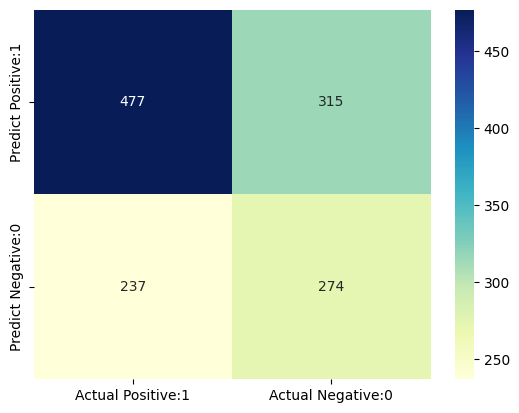

In [25]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Clasificamos las métricas

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63       792
           1       0.47      0.54      0.50       511

    accuracy                           0.58      1303
   macro avg       0.57      0.57      0.57      1303
weighted avg       0.59      0.58      0.58      1303



In [27]:
y_pred_prob_df = pd.DataFrame(data=predictions, columns=['Braindead: el retorno'])

y_pred_prob_df.value_counts()

Braindead: el retorno
0                        714
1                        589
dtype: int64

In [28]:
y_pred1 = model.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequencia')

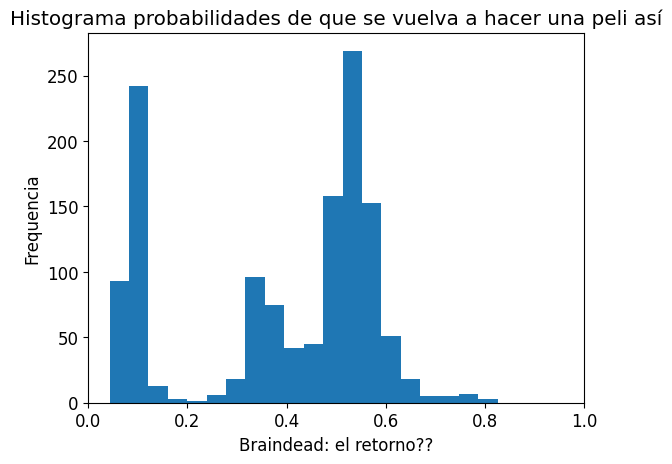

In [29]:
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 20)


# set the title of predicted probabilities
plt.title('Histograma probabilidades de que se vuelva a hacer una peli así')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Braindead: el retorno??')
plt.ylabel('Frequencia')

In [30]:
X_test

,vote_average,duration,revenues,popularity,val_count,quantile
0,0.48,0.118421,0.000000,0.001755,1.000000,1.0
1,0.51,0.190789,0.000000,0.016546,0.118723,0.0
2,0.62,0.139803,0.022547,0.013587,0.015181,0.0
3,0.64,0.144737,0.000000,0.012842,1.000000,1.0
4,0.29,0.157895,0.000000,0.004042,0.118723,0.0
...,...,...,...,...,...,...
1298,0.10,0.134868,0.000000,0.002983,1.000000,1.0
1299,0.39,0.161184,0.000000,0.013376,0.042818,0.0
1300,0.55,0.161184,0.000000,0.017539,0.000389,0.0
1301,0.70,0.217105,0.000000,0.003994,0.025302,0.0


POCAS

Curva ROC

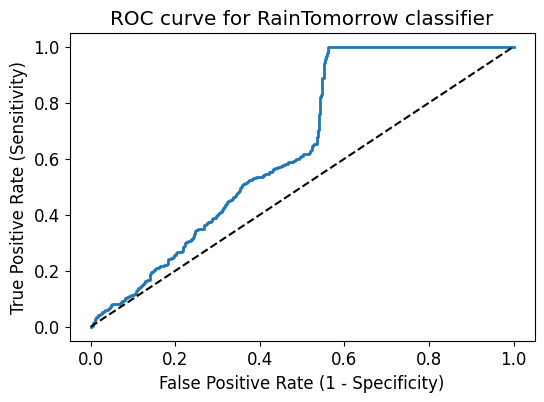

In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(np.array(y_test), np.array(y_pred1))

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.62476008 0.60172745 0.58253359 0.58925144 0.6074856 ]


In [33]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.6012


Mejor que el valor del modelo

Mejora con GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=1.8, solver='saga'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [35]:


# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))



GridSearch CV best score : 0.6027


Parameters that give the best results : 

 {'C': 1}


Estimator that was chosen by the search : 

 LogisticRegression(C=1, solver='saga')


In [36]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.5756


In [37]:
c_matrix = confusion_matrix(y_test, predictions)
c_matrix

array([[477, 315],
       [237, 274]], dtype=int64)

<AxesSubplot: >

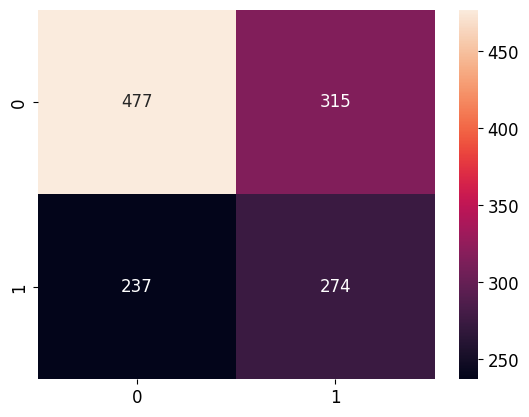

In [41]:
import seaborn as sns
sns.heatmap(c_matrix, fmt="g",annot=True)

<AxesSubplot: >

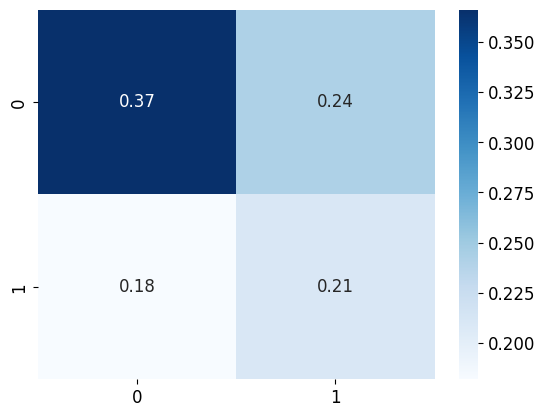

In [39]:
sns.heatmap(c_matrix/c_matrix.sum(), annot=True, cmap="Blues", fmt= ".2")

In [42]:
X_nueva = [[2.57100e+03, 2.97682e+02, 1.14300e+03, 6.90000e+00, 3 ,5]]
model.predict(X_nueva)


array([1], dtype=int64)